In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\Data\vivek_sir\driver-data.csv")
data.head(10)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


In [3]:
data = data.iloc[:,1:]

In [4]:
data.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [5]:
data.isnull().sum()

mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [7]:
data.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [8]:
data.shape

(4000, 2)

In [10]:
X = data.iloc[:,0]
y = data.iloc[:,1]

In [11]:
y

0       28
1       25
2       27
3       22
4       25
        ..
3995    10
3996     5
3997    12
3998     5
3999     9
Name: mean_over_speed_perc, Length: 4000, dtype: int64

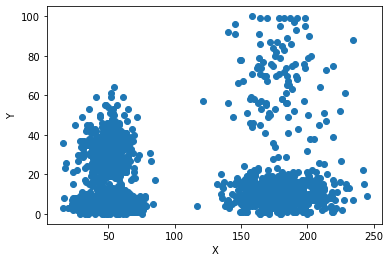

In [12]:
plt.scatter(X,y)
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

In [18]:
from sklearn.cluster import KMeans

In [19]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

In [20]:
sse

[12184626.129627967,
 1316420.850947721,
 992634.06067025,
 719601.5383469046,
 534642.626918064,
 372843.26287770533,
 319829.74456356117,
 276920.9011315523,
 252745.10530564637]

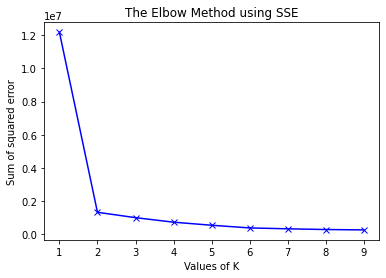

In [21]:
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method using SSE')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans.labels_
pred = kmeans.predict(data)
centers = kmeans.cluster_centers_

In [23]:
data['pred'] = pred

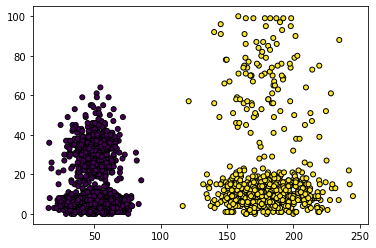

In [24]:
plt.scatter(data['mean_dist_day'],data['mean_over_speed_perc'], marker='o', c=pred,
            s=25, edgecolor='k')
plt.show()